In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.patches import Patch

In [2]:
metadata = pd.read_csv("metadata.csv").dropna()

In [3]:
features = ["Fast trough V (long square) (millivolts)",
           "F I curve slope","Peak V (long square) (millivolts)",
           "Threshold V (long square) (millivolts)",
           "Upstroke/downstroke ratio (long square)", "Vrest (millivolts)"]

In [4]:
features = ["Trough","Frequency","Peak","Threshold","Ratio","Vrest"]

In [5]:
celltype = metadata["Cell Type"]

In [6]:
sst = metadata["Cell Type"]=="Sst interneuron"
pv = metadata["Cell Type"]=="Pvalb interneuron"
vip = metadata["Cell Type"]=="Vip interneuron"
lamp5 = metadata["Cell Type"]=="Lamp5 interneuron"
sncg = metadata["Cell Type"]=="Sncg interneuron"

In [128]:
def plot(feature,ax):
    tukey = pairwise_tukeyhsd(metadata[feature],groups=metadata["Cell Type"])
    pvalues = np.clip(tukey.pvalues,1e-10,1)
    pvalues = -np.log10(pvalues)
    groups = ['Lamp5', 'Pvalb', 'Sncg', 'Sst', 'Vip']
    pval_matrix = pd.DataFrame(np.ones((5,5)), columns=groups, index=groups)
    idx = 0
    for i, j in itertools.combinations(range(5), 2):
        pval_matrix.iloc[j, i] = pvalues[idx]
        pval_matrix.iloc[i, j] = pvalues[idx]  # symmetry
        idx += 1
    
    mask = np.triu(np.ones_like(pval_matrix, dtype=bool))
    
    # Define a colormap: small p-values = dark, high p-values = light
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Draw the heatmap
    sns.heatmap(pval_matrix, 
                mask=mask, 
                cmap=cmap, 
                annot=True,  # show numbers
                fmt=".1f",   # format p-values
                cbar_kws={"label": "-lg p-value"},
                vmin=0, vmax=12,  # full p-value range
                ax=ax)

In [115]:
cell_types = ['Sst', 'Lamp5', 'Pvalb',
               'Vip', 'Sncg']
cmap = plt.colormaps['viridis']
colors = [cmap(i) for i in np.linspace(0, 1, len(cell_types))]
cell_type_to_color = dict(zip(cell_types, colors))

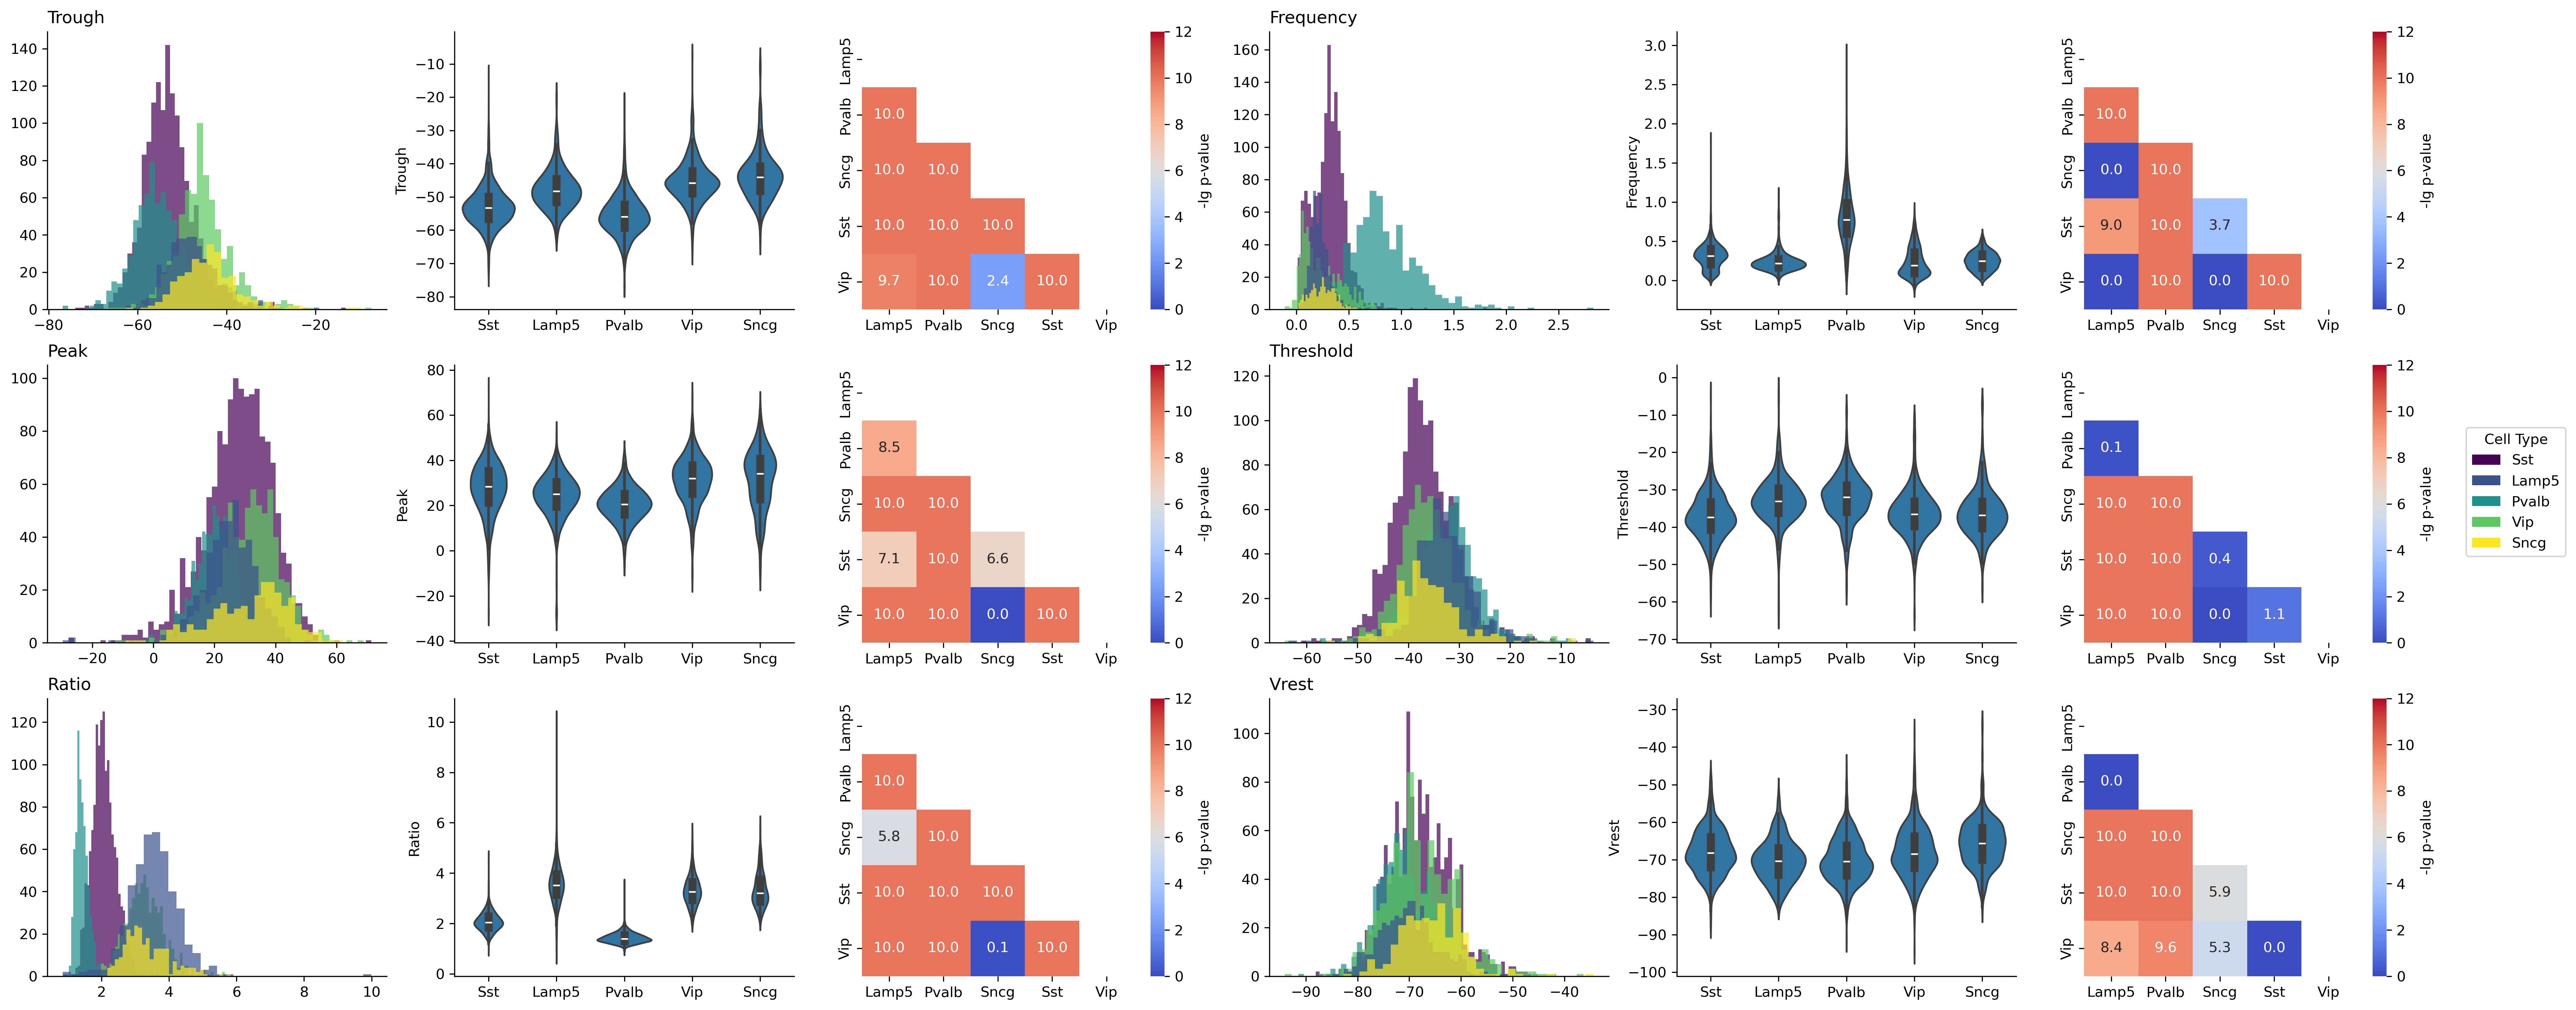

In [130]:
fig, axes = plt.subplots(3,6,figsize=(30,12),dpi=300)
for i,feature in zip(range(0,19,3),features):
    ax = axes[i//6][i%6]
    X = metadata[feature]
    ax.hist(X[sst],bins=round(5*len(X[sst])**(1/3)),alpha=0.7,label="Sst",color=colors[0])
    ax.hist(X[pv],bins=round(5*len(X[pv])**(1/3)),alpha=0.7,label="Pvalb",color=colors[2])
    ax.hist(X[vip],bins=round(5*len(X[vip])**(1/3)),alpha=0.7,label="Vip",color=colors[3])
    ax.hist(X[lamp5],bins=round(5*len(X[lamp5])**(1/3)),alpha=0.7,label="Lamp5",color=colors[1])
    ax.hist(X[sncg],bins=round(5*len(X[sncg])**(1/3)),alpha=0.7,label="Sncg",color=colors[4])
    ax.set_title(feature,loc="left")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax = axes[i//6][i%6+1]
    sns.violinplot(metadata,x="Cell Type",y=feature,ax=ax,)
    ax.set_xlabel(None)
    ax.set_xticks([0,1,2,3,4],["Sst","Lamp5","Pvalb","Vip","Sncg"])
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    ax = axes[i//6][i%6+2]
    plot(feature,ax)

legend_elements = [Patch(facecolor=cell_type_to_color[ct], label=ct) for ct in cell_types]
plt.legend(handles=legend_elements, title="Cell Type",bbox_to_anchor=(1.8,2))
plt.savefig("Feature.png",bbox_inches="tight")